TBC - To be changed

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
from pathlib import Path
from glob import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)
data_dir = Path('/content/drive/MyDrive/SCCSem3/300/Lab2/Leaves/') #change the path here
folders = ["canker","healthy","greening","blackspot"]

Mounted at /content/drive/


In [ ]:
#important variables
img_height = 128
img_width = 128

In [ ]:
dir_paths = []
dir_paths = [x[0] for x in os.walk(data_dir)]
dir_paths = dir_paths[1:]

In [ ]:
dir_paths

['/content/drive/MyDrive/SCCSem3/300/Lab2/Leaves/canker',
 '/content/drive/MyDrive/SCCSem3/300/Lab2/Leaves/healthy',
 '/content/drive/MyDrive/SCCSem3/300/Lab2/Leaves/greening',
 '/content/drive/MyDrive/SCCSem3/300/Lab2/Leaves/blackspot']

In [ ]:
output = []
labels = []

def create_output():
  for folder in folders:
    path = os.path.join(data_dir, folder)
    class_num = folders.index(folder)
    for img in Path(path).iterdir():
      current_img = load_img(os.path.join(path, img), target_size = (128,128), color_mode="grayscale") # loading the images and resizing it in grayscale
      num_image = img_to_array(current_img).reshape(128, -1) # converting images to numpy array
      output.append(num_image)
      labels.append(class_num)
      finalarr = np.array(output)
      labelarr = np.array(labels)
  return (finalarr, labelarr)
    

In [ ]:
op = create_output()

In [ ]:
op[0].shape

(596, 128, 128)

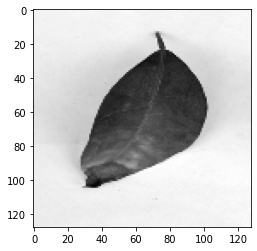

In [ ]:
plt.imshow(op[0][1], cmap = "gray")
plt.show()

In [ ]:
def splitData(XSet, YSet):

  train_ratio = 0.70
  validation_ratio = 0.20
  test_ratio = 0.10

  ratios = {}

  # train is now 75% of the entire data set
  # the _junk suffix means that we drop that variable completely
  x_train, x_test, y_train, y_test = train_test_split(XSet, YSet, stratify = YSet, test_size=1 - train_ratio)

  # test is now 10% of the initial data set
  # validation is now 15% of the initial data set
  x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, stratify = y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

  ratios["train"] = (x_train, y_train)
  ratios["val"] = (x_val, y_val)
  ratios["test"] = (x_test, y_test)

  
  return ratios


In [ ]:
dsets = splitData(op[0],op[1])

In [ ]:
print(dsets["val"][1].shape)

(119,)


In [ ]:
(unique, counts) = np.unique(dsets["train"][1], return_counts=True)

print(counts/417)

[0.27338129 0.09592326 0.34292566 0.28776978]


In [ ]:
print(dsets["test"][1].shape)

(60,)


In [ ]:
(unique, counts) = np.unique(dsets["test"][1], return_counts=True)

print(counts/60)

[0.26666667 0.1        0.35       0.28333333]


In [ ]:
train_images_n = dsets["train"][0]
test_images_n = dsets["test"][0]
valid_images_n = dsets["val"][0]
train_labels_n = dsets["train"][1]
test_labels_n = dsets["test"][1]
valid_labels_n = dsets["val"][1]

In [ ]:
train_images_n = train_images_n.astype('float32') / 255
train_images_n = train_images_n.reshape((417, 128 * 128))

test_images_n = test_images_n.astype('float32') / 255
test_images_n = test_images_n.reshape((60, 128 * 128))

valid_images_n = valid_images_n.astype('float32') / 255
valid_images_n = valid_images_n.reshape((119, 128 * 128))

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels_n = to_categorical(train_labels_n)
test_labels_n = to_categorical(test_labels_n)
valid_labels_n = to_categorical(valid_labels_n)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(128 * 128,)))
network.add(Dense(4, activation='softmax'))

In [ ]:
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
historynn = network.fit(train_images_n, train_labels_n,validation_data=(valid_images_n,valid_labels_n), epochs=20, batch_size=128, verbose=1)

test_loss, test_acc = network.evaluate(test_images_n, test_labels_n)

print('test_acc:', test_acc)

Epoch 1/20
4/4 [==============================] - 0s 35ms/step - loss: 1.3050 - accuracy: 0.3429 - val_loss: 1.3115 - val_accuracy: 0.3361
Epoch 2/20
4/4 [==============================] - 0s 22ms/step - loss: 1.3049 - accuracy: 0.3429 - val_loss: 1.3115 - val_accuracy: 0.3361
Epoch 3/20
4/4 [==============================] - 0s 20ms/step - loss: 1.3050 - accuracy: 0.3429 - val_loss: 1.3117 - val_accuracy: 0.3361
Epoch 4/20
4/4 [==============================] - 0s 22ms/step - loss: 1.3049 - accuracy: 0.3429 - val_loss: 1.3118 - val_accuracy: 0.3361
Epoch 5/20
4/4 [==============================] - 0s 22ms/step - loss: 1.3051 - accuracy: 0.3429 - val_loss: 1.3119 - val_accuracy: 0.3361
Epoch 6/20
4/4 [==============================] - 0s 22ms/step - loss: 1.3050 - accuracy: 0.3429 - val_loss: 1.3119 - val_accuracy: 0.3361
Epoch 7/20
4/4 [==============================] - 0s 20ms/step - loss: 1.3049 - accuracy: 0.3429 - val_loss: 1.3117 - val_accuracy: 0.3361
Epoch 8/20
4/4 [===========

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
results = network.predict(test_images_n)
predicted_categories = tf.argmax(results, axis=1)
confusion_matrix(predicted_categories, test_labels_n.nonzero()[1])

array([[ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [16,  6, 21, 17],
       [ 0,  0,  0,  0]])